# Advanced Machine Learning Project : EasyVisa - Problem Statement

### Problem Statement 

**Context:**
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).
OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

**Objective:**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.
The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:
1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

**Data Description:**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.
1) `case_id`: ID of each visa application
2) `continent`: Information of continent the employee
3) `education_of_employee`: Information of education of the employee
4) `has_job_experience`: Does the employee has any job experience? Y= Yes; N = No
5) `requires_job_training`: Does the employee require any job training? Y = Yes; N = No
6) `no_of_employees`: Number of employees in the employer's company
7) `yr_of_estab`: Year in which the employer's company was established
8) `region_of_employment`: Information of foreign worker's intended region of employment in the US.
9) `prevailing_wage`: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
10) `unit_of_wage`: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
11) `full_time_position`: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
12) `case_status`: Flag indicating if the Visa was certified or denied


**Installing the Librararies**

In [3]:
!pip install xgboost
!pip install imblearn --user
!pip install imbalanced-learn --user

**Importing the Librararies**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier as bc, RandomForestClassifier as rfc,AdaBoostClassifier as abc,GradientBoostingClassifier as gbc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,make_scorer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split as tts, GridSearchCV as gsv, RandomizedSearchCV as rsv

import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [7]:
data=pd.read_csv('EasyVisa.csv')
# Data copying in done during Data preprocessing

**shape of the data** 

In [9]:
data.shape

(25480, 12)

**Observation :**
- The Data has 25480 rows and 12 Rows.

**First 5 rows of the data**

In [12]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [13]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observation:**
- There is no null data present.

In [15]:
data.duplicated().sum()

0

**Observation:**
- There is no dupilcate data present.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observation:**
- There are three numerical data columns and all other columns  are object datatype.

In [19]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:**
- `no_of_employees`,`yr_of_estab` and `prevailing_wage` are the only Numeric columns in the data.
- `no_of_employees` has a mean of 5667 and has a min of -26 which needs to be rectified.
- `yr_of_estab` ranges between 1800 to 2016.
- `prevailing_wage` vary from a minimum of 2.136 to 319210.27.
- The Foreign worker most intended region of work is Northeast.
- The most of the workers are from Asia.
- The most of them have bachelor degree.

**Exploratory data analysis**

In [22]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**Univariate Anaysis:**

In [24]:
# Funtion for plotting univariate plots
def univarnum(d,m):
    fi,a=plt.subplots(2,1,figsize=(15,5))
    a=a.flatten()
    sns.histplot(data=d,x=m,ax=a[0],kde=True)
    sns.boxplot(data=d,x=m,ax=a[1],showmeans=True)
    fi.suptitle(f'The Histogram and box plot of {m}')
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()


**1.`case id`**

In [26]:
data.case_id

0           EZYV01
1           EZYV02
2           EZYV03
3           EZYV04
4           EZYV05
           ...    
25475    EZYV25476
25476    EZYV25477
25477    EZYV25478
25478    EZYV25479
25479    EZYV25480
Name: case_id, Length: 25480, dtype: object

**Observation:**
- Since `case_id` is unique to all the rows it doesn't provide any information for the analysis it can be removed for further process.

**2.`no_of_employees`**

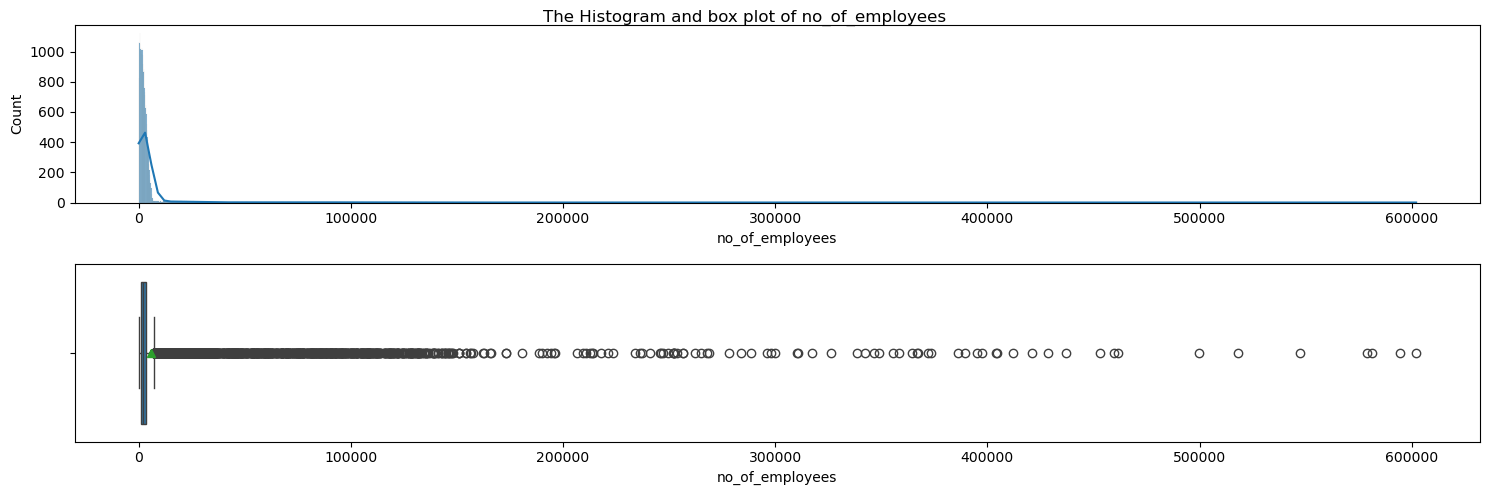

In [29]:
univarnum(data,'no_of_employees')

In [30]:
data['no_of_employees'].median(),data['no_of_employees'].mean()

(2109.0, 5667.043210361067)

**Observation:**
- The data is right skewed as the mean is greater than median.
- the negative numbers in the data have insignificant effects, in which the number of negatives are very less. It might be mistake in the data entry part so it can be rectified as typing error.
- Outliers are observed in the data.
- Further based on the `no_of_employees`, The data may have different classes of companies based on the size or the infrastructure of the company. 

**2.`prevailing_wage`**

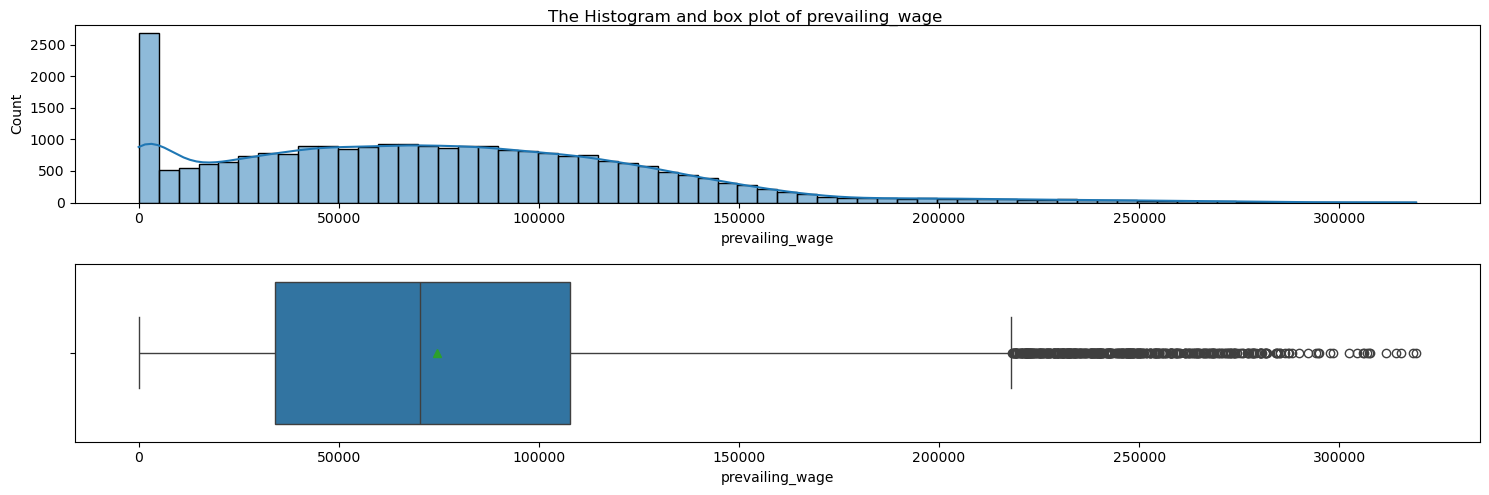

In [33]:
univarnum(data,'prevailing_wage')

**Observation**:
- The `prevailing_wage` data is Right skewed as the mean is greater than median.
- Outliers are Observed in the data.
- The wage varies with values going near zero to maximum of above 200000, which might be due to salaries entered with varying type of work like hourly,yearly,etc.

**3.`Categories`**

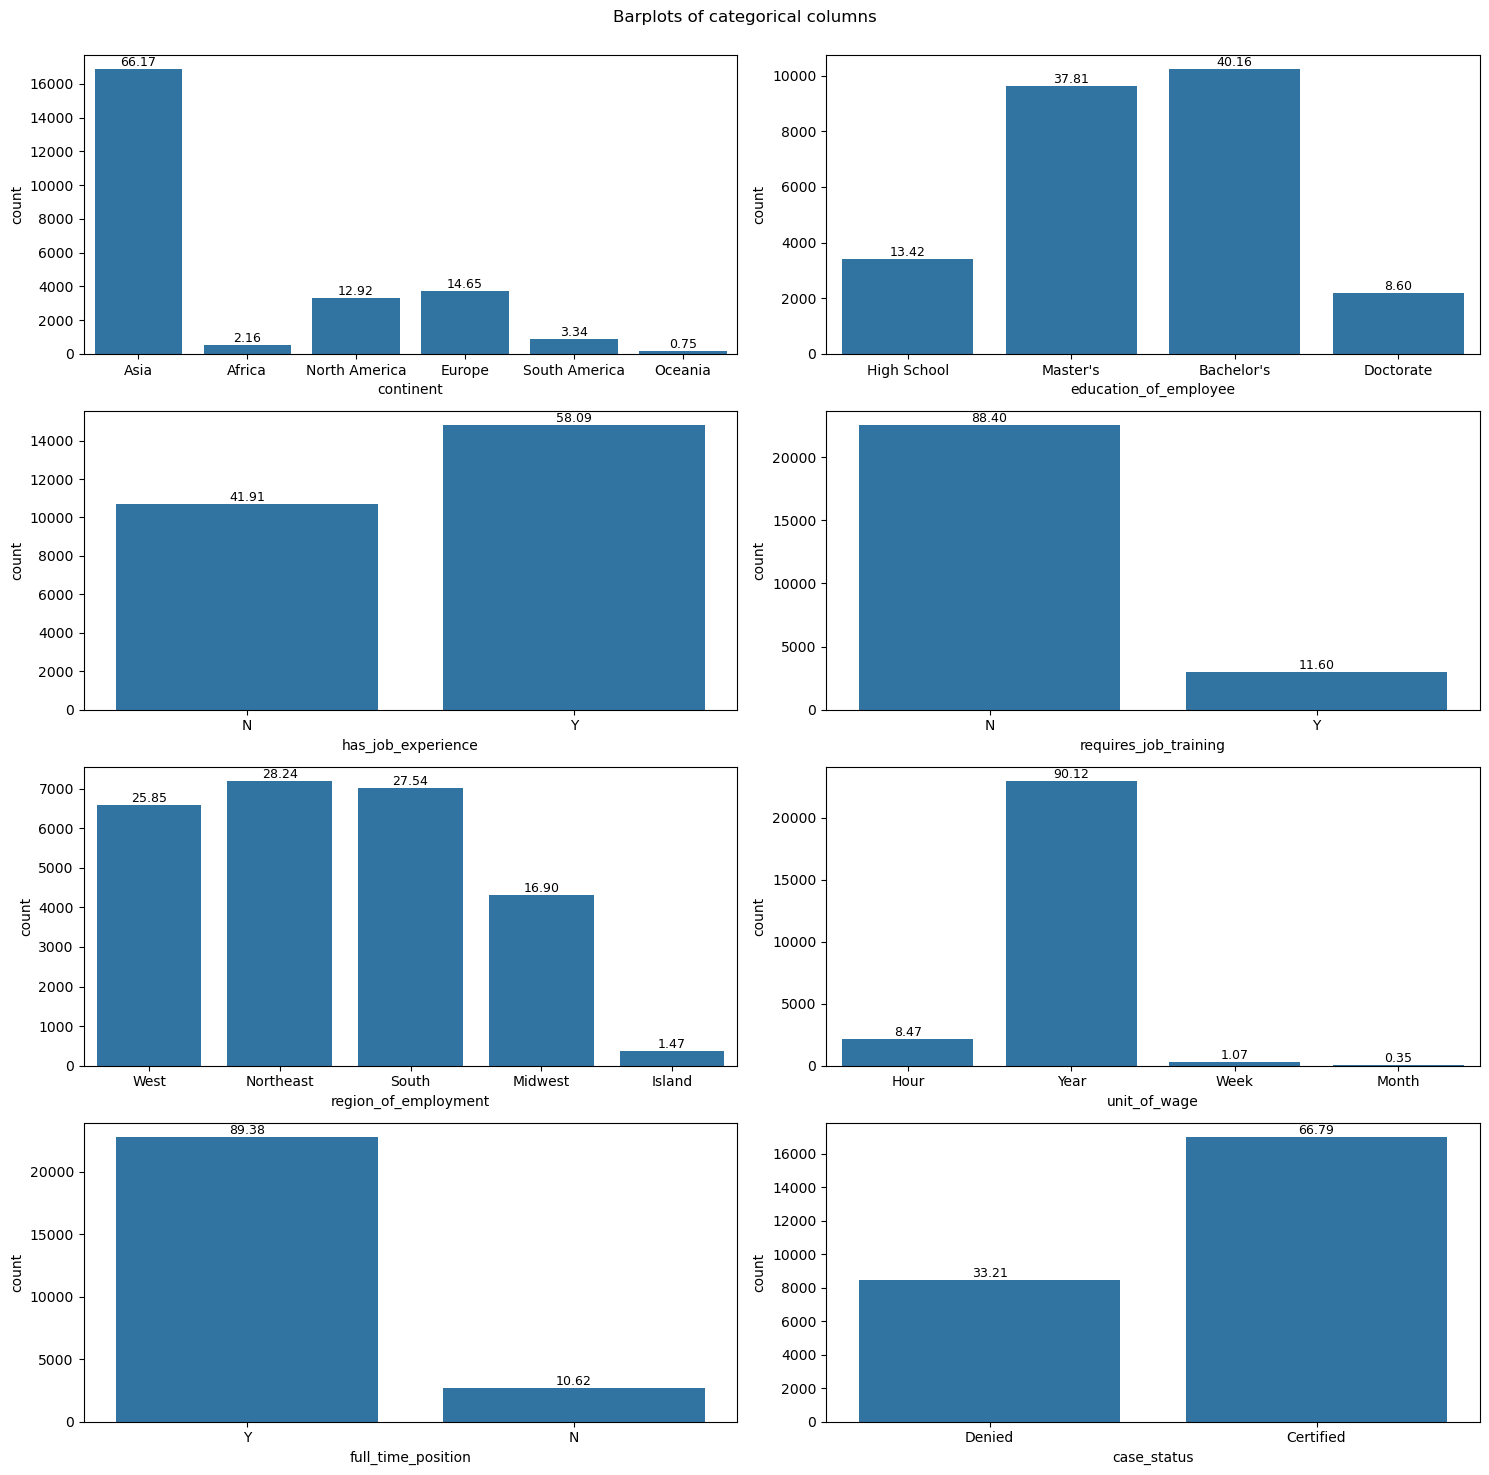

In [36]:
cat_cols=['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training',
       'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status']
d,s=plt.subplots(4,2,figsize=(15,15))
s=s.flatten()
for i,j in enumerate(cat_cols):
    sns.countplot(data=data,x=j,ax=s[i])
    t=len(data[j])
    for a in s[i].patches:
        perc=((a.get_height()/t)*100)
        s[i].text(a.get_x()+a.get_width()/2,a.get_height()+1,f'{perc:.2f}',fontsize=9,ha='center',va='bottom')
plt.tight_layout()
d.suptitle(f'Barplots of categorical columns')
plt.subplots_adjust(top=0.95)
plt.show()
    

**Observation:**
- **`continent:`** The most Recorded `continent` is Asia with 66% followed by Europe with 15% and North America with 13%.
- **`education_of_employee:`** The most of workers applied had a batchelor's degree(40%) followed by master's degree(38%), highschool education(13%) and with doctorate(9%), almost 87% of workers have education more high school.
- **`'has_job_experience':`** About 58% of workers have Job experience.
- **`requires_job_training:`** About 88% of workers don't need Job training.
- **`region_of_employment:`** west(25%), northeast(28%), south(27%) these three regions have well balanced number of workers.
- **`unit_of_wage:`** Most of the workers have Yearly wage(90%).
- **`full_time_position:`** Most of the workers have full time positions(90%).
- **`case_status:`** 2/3 third of the workers got Certified.


**4.`yr_of_estab`**

In [39]:
year_list=data['yr_of_estab'].value_counts(ascending=False)

In [40]:
top_20year=year_list.head(20).index.tolist()

In [41]:
type(top_20year[1])

int

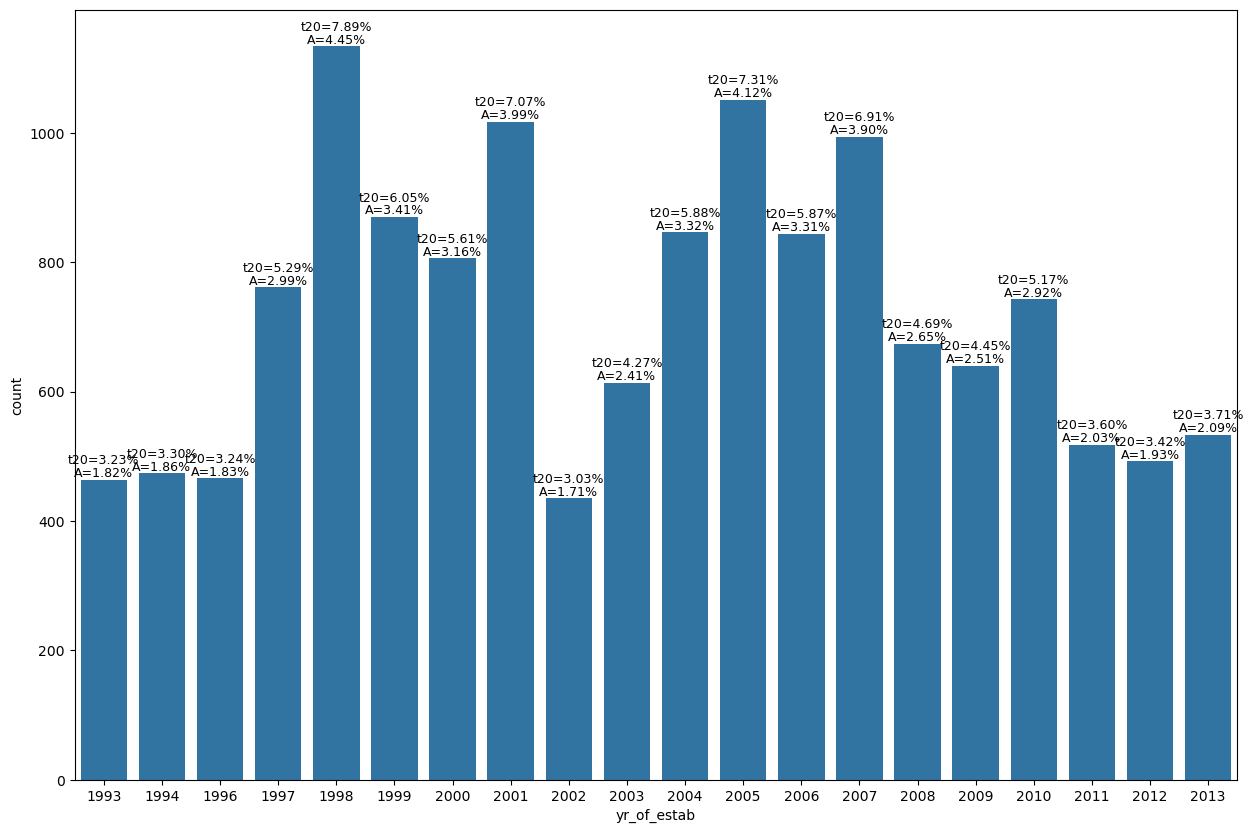

<Figure size 640x480 with 0 Axes>

In [42]:
plt.figure(figsize=(15,10))
s=sns.countplot(data=data[data['yr_of_estab'].isin(top_20year)],x='yr_of_estab')
t_20=len(data[data['yr_of_estab'].isin(top_20year)])
t=len(data)
for i in s.patches:
    per_20=(i.get_height()/t_20)*100
    per_a=(i.get_height()/t)*100
    s.text(i.get_x()+i.get_width()/2,i.get_height()+20,f'A={per_a:.2f}%',fontsize=9,ha='center',va='top')
    s.text(i.get_x()+i.get_width()/2,i.get_height()+40,f't20={per_20:.2f}%',fontsize=9,ha='center',va='top')
plt.show()
plt.tight_layout()


**Observation:**
- most of the companies were established in 1998 about 4.5% in all of data and around 8% in top 20

Multivariate

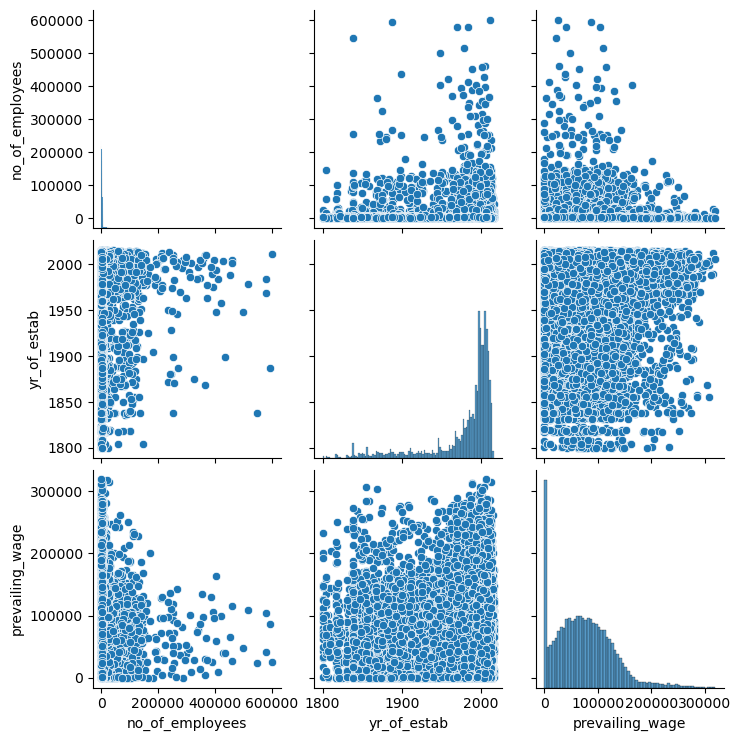

In [45]:
sns.pairplot(data)

<Axes: >

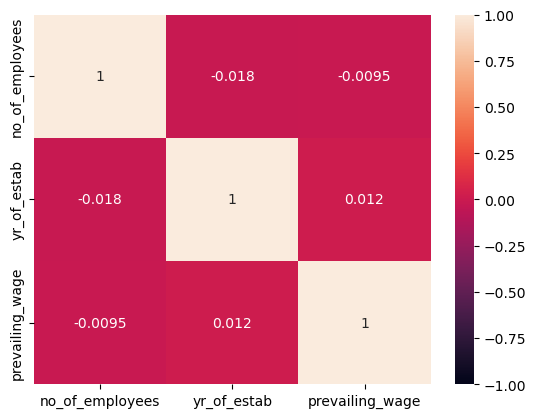

In [46]:
sns.heatmap(data[data.select_dtypes(exclude='object').columns.tolist()].corr(),annot=True,vmax=1,vmin=-1,cbar=True)

**Observation:**
- It seems there is no correlation in between the numerical columns

**Bi-Variate anlysis w.r.t Target**

In [49]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [50]:
#Function for plotting bivariate analysis
def bivar_num_target(x,Target):
    f,a=plt.subplots(2,2,figsize=(10,5))
    a=a.flatten()
    sns.histplot(data=data,x=x,hue=Target,kde=True,ax=a[0])
    sns.boxplot(data=data,x=Target,y=x,ax=a[1])
    sns.boxplot(data=data,x=Target,y=x,showfliers=False,ax=a[2])
    f.delaxes(a[3])
    plt.tight_layout()
    plt.title(f'Distribution of {x} w.r.t {Target}')
    plt.show()

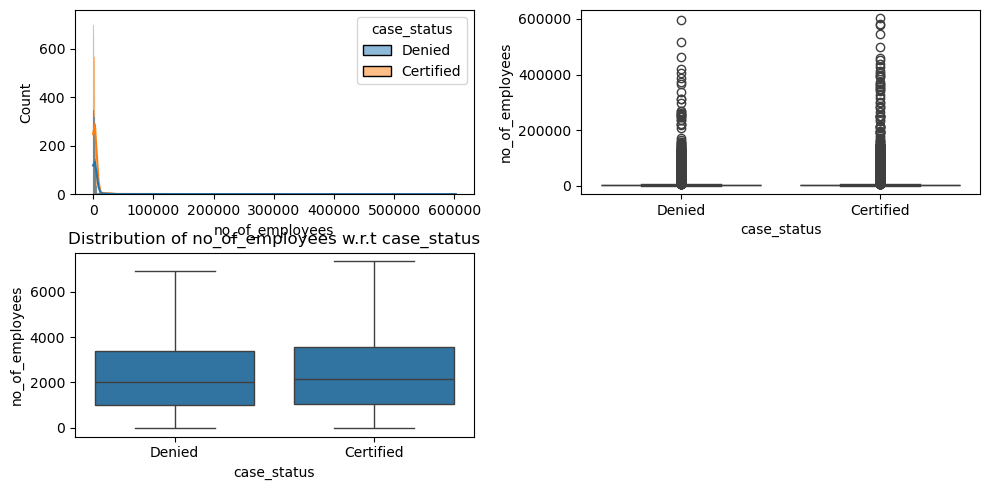

------------------------------------------------------------------------------------------------------------------------------------------------------


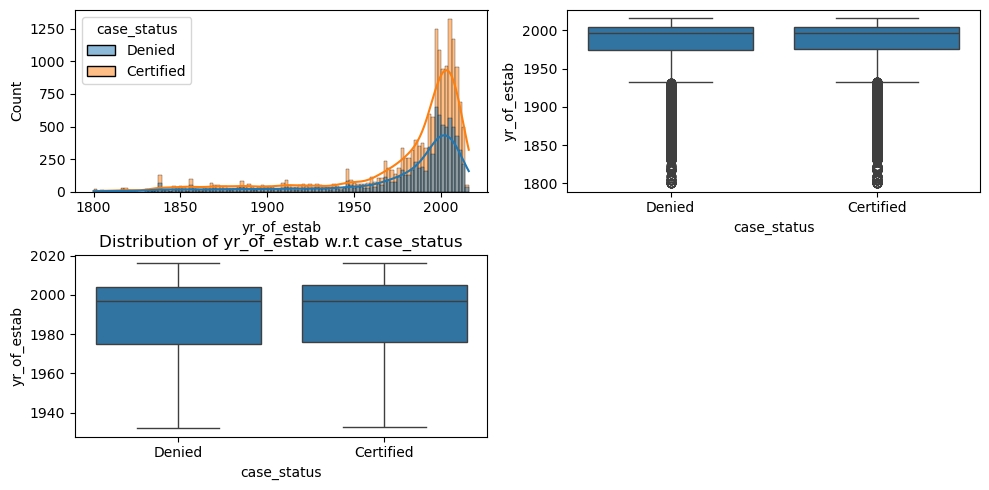

------------------------------------------------------------------------------------------------------------------------------------------------------


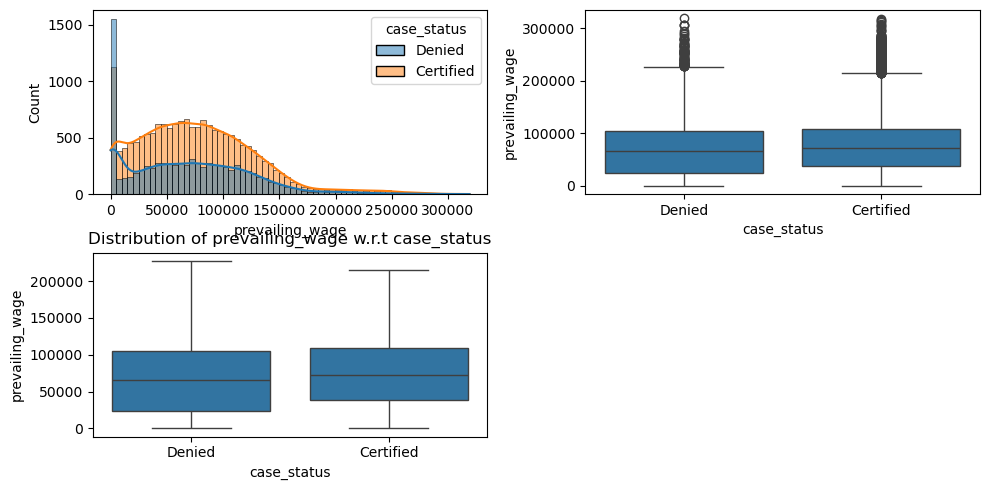

------------------------------------------------------------------------------------------------------------------------------------------------------


In [51]:
# Numerical w.r.t Target
ncols=['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Target='case_status'
for i in ncols:
    bivar_num_target(i,Target)
    print('-'*150)

**Observation:**
- `no_of_employees`: There is insignificant Relationship with the target.
- `yr_of_estab`: There is insignificant Relationship with the target.
- `prevailing_wage`: median wage of certified is slighly higher than denied.

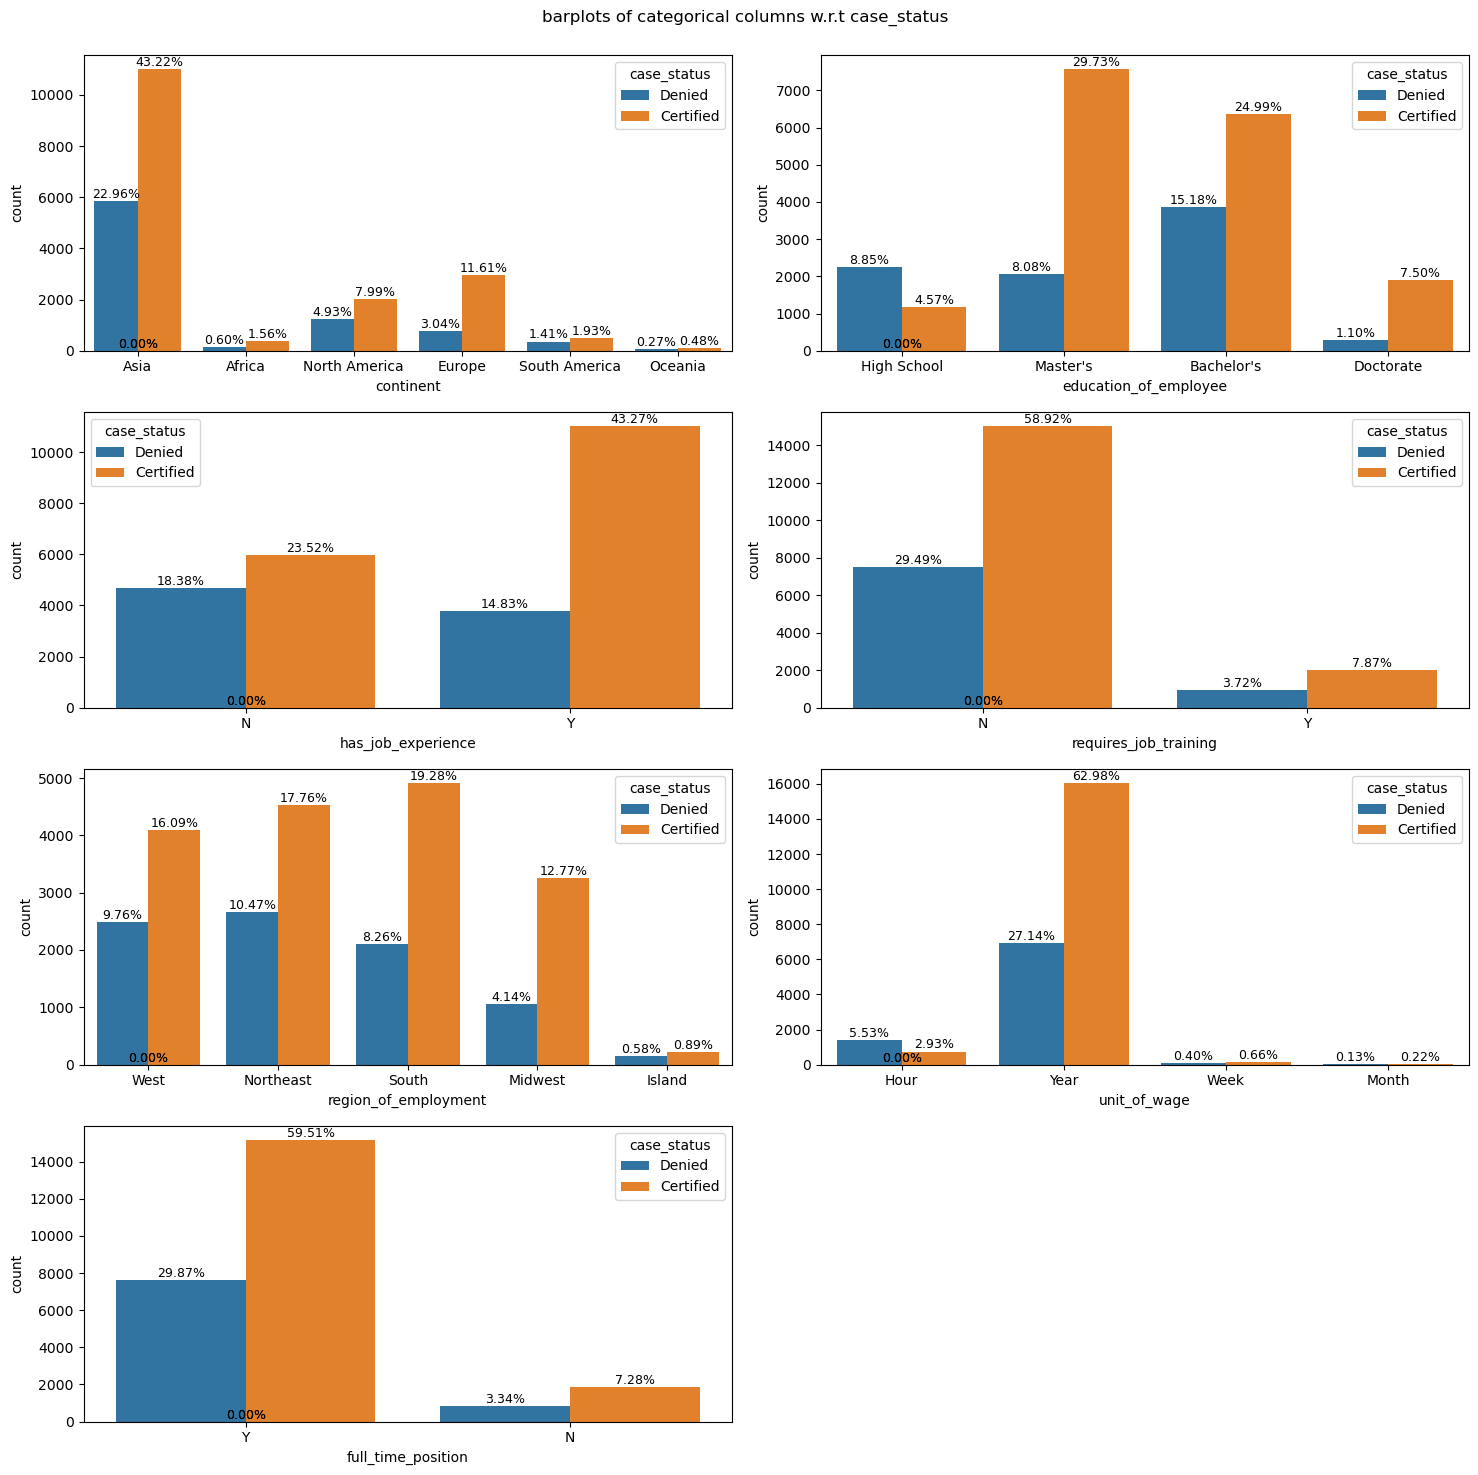

In [53]:
cate_cols=['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training',
       'region_of_employment', 'unit_of_wage',
       'full_time_position']
fi,ax=plt.subplots(4,2,figsize=(15,15))
ax=ax.flatten()
for i,j in enumerate(cate_cols):
    sns.countplot(data=data,x=j,hue=Target,ax=ax[i])
    t=len(data)
    for a in ax[i].patches:
        per=(a.get_height()/t)*100
        ax[i].text(a.get_x()+a.get_width()/2,a.get_height()+1,f'{per:.2f}%',fontsize=9,va='bottom',ha='center')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
for i  in range(len(cate_cols),len(ax)):
    fi.delaxes(ax[i])
fi.suptitle(f'barplots of categorical columns w.r.t {Target}')
plt.show()

**Observation:**
- **`continent:`** The most of the certified workers are from Asia(43%).
- **`education_of_employee:`** Most of the certified workers have masters degree even though number of bachelors applicants are high.
- **`has_job_experience:`** most of certified workers has Job experience.
- **`requires_job_training:`** Most of certified worker doesnot require job training and most of them have previous experience which correlates.
- **`region_of_employment:`** South has the highest number of certified workers around 19%.
-  **`unit_of_wage:`** Most of certified workers have yearly wage around 63%. 
-  **`full_time_position:`** around 59% of certified workers are in full time posiion.

**Data preprocessing**

In [56]:
# making acopy of data before making changes 
dx=data.copy()

**1)negative `no_of_employees`:**

In [58]:
# no of employees
dx[dx['no_of_employees']<0].shape[0]

33

In [59]:
# considering the negatives as typing errors and and are being rectified here
dx['no_of_employees']=dx['no_of_employees'].apply(lambda x:np.abs(x))

In [60]:
dx[dx['no_of_employees']<0].shape[0]

0

**2. dropping the `case_id`**

In [62]:
dx['case_id'].nunique()

25480

In [63]:
dx.shape

(25480, 12)

In [64]:
#Since case study doesn't contribute to machine learning.
dx=dx.drop('case_id',axis=1)

In [65]:
dx.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**3.Label Encoding the Target**

In [67]:
case_dict={'Certified':1,'Denied':0}
dx['case_status']=dx['case_status'].map(case_dict)

**4.Splitting of data** 

In [69]:
x=dx.drop('case_status',axis=1)
y=dx['case_status']

In [70]:
y.value_counts(normalize=True)

case_status
1    0.667896
0    0.332104
Name: proportion, dtype: float64

**5.One-Hot encoding other non numeric columns**

In [72]:
x=pd.get_dummies(x)

**6.Data-splitting in train-val-test**

In [74]:
x_train,x_temp,y_train,y_temp=tts(x,y,test_size=.5,stratify=y)
x_val,x_test,y_val,y_test=tts(x_temp,y_temp,test_size=.4,stratify=y_temp)
x_train.shape[0]/25480,x_val.shape[0]/25480,x_test.shape[0]/25480

(0.5, 0.3, 0.2)

In [75]:
y_train.value_counts(normalize=True),y_val.value_counts(normalize=True),y_temp.value_counts(normalize=True)

(case_status
 1    0.667896
 0    0.332104
 Name: proportion, dtype: float64,
 case_status
 1    0.667844
 0    0.332156
 Name: proportion, dtype: float64,
 case_status
 1    0.667896
 0    0.332104
 Name: proportion, dtype: float64)

# Bagging and Boosting Models: Evaluation Criteria

### Key Considerations for Model Evaluation:
The model's performance is evaluated based on its ability to avoid two types of incorrect predictions:
1. Predicting an applicant should be approved when they should be denied.
2. Predicting an applicant should be denied when they should be approved.

### Importance of Both Scenarios:
Both types of errors have significant consequences:
- **Approving when Denial is Appropriate**: This may result in an unqualified individual taking a position meant for a U.S. citizen, potentially leading to missed opportunities for deserving candidates.
- **Denying when Approval is Appropriate**: This can prevent U.S. companies from filling critical positions, reducing overall productivity and economic growth.

### Strategies to Minimize Losses:
Given the high cost and resource intensity of reviewing applications, the model should prioritize identifying applicants likely to be approved. This allows human agents to focus on these applications first, streamlining the decision-making process.

### Metric for Model Evaluation:
The **F1 Score** is an appropriate metric for evaluating the model. It balances precision and recall, ensuring that both False Positives and False Negatives are minimized. A higher F1 Score indicates better overall model performance in managing these trade-offs effectively.



## Finding which Dataset to train the model since there is imbalance in the data set.

In [78]:
# making oversampled and inder sampled datsets
oversam=SMOTE(sampling_strategy=1,random_state=1)
undersam=RandomUnderSampler(sampling_strategy=1,random_state=1)

In [79]:
x_over,y_over=oversam.fit_resample(x_train,y_train)

In [80]:
x_under,y_under=undersam.fit_resample(x_train,y_train)

In [81]:
y_over.value_counts(),y_under.value_counts(),y_train.value_counts()

(case_status
 1    8509
 0    8509
 Name: count, dtype: int64,
 case_status
 0    4231
 1    4231
 Name: count, dtype: int64,
 case_status
 1    8509
 0    4231
 Name: count, dtype: int64)

In [82]:
# model evaluation function
def mod_eval(m,x,y):
    pred=m.predict(x)
    a=accuracy_score(y,pred)
    p=precision_score(y,pred)
    r=recall_score(y,pred)
    f1=f1_score(y,pred)
    df=pd.DataFrame({'Accuracy Score':a,'Precision score':p,'Recall score':r,'F1 score':f1},index=[0])
    return df

In [83]:
# confusion matirx function
def conf(m,x,y):
    pred=m.predict(x)
    con=confusion_matrix(y,pred)
    label=np.asarray([[f'{i:.2f}'+f'\n{(i/con.sum())*100:.2f}'] for i in con.flatten()]).reshape(2,2)
    sns.heatmap(con,annot=label,fmt='')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [84]:
# function for both evalution and confusion matrix 
def mod_eval_conf(m,x,y):
    print(mod_eval(m,x,y))
    print('-'*100)
    conf(m,x,y)

### **Bagging:**

### **model Building Bagging  with diff dataset**

In [87]:
# function for getting training result of training in three different dataset 
def pde(m1,m2,m3):
    
    dfe=pd.concat([mod_eval(m1,x_train,y_train).T,mod_eval(m2,x_over,y_over).T,mod_eval(m3,x_under,y_under).T],axis=1)
    dfe.columns=['original','over','under']
    return dfe

# function for getting validation result of training in three different dataset 
def pdv(m1,m2,m3):
    
    dfee=pd.concat([mod_eval(m1,x_val,y_val).T,mod_eval(m2,x_val,y_val).T,mod_eval(m3,x_val,y_val).T],axis=1)
    dfee.columns=['original','over','under']
    return dfee

**1) DecisionTreeClassifier with three different datas**

In [89]:
# making three models for three different dataset. 
d2=DecisionTreeClassifier(random_state=1)
d2.fit(x_train,y_train)
d3=DecisionTreeClassifier(random_state=1)
d3.fit(x_over,y_over)
d4=DecisionTreeClassifier(random_state=1)
d4.fit(x_under,y_under)

DecisionTreeClassifier(random_state=1)

In [90]:
# performance of decision tree based training on three different dataset
pde(d2,d3,d4)

,original,over,under
Accuracy Score,1.0,1.0,1.0
Precision score,1.0,1.0,1.0
Recall score,1.0,1.0,1.0
F1 score,1.0,1.0,1.0


In [91]:
# performance of decision tree based validating on three different dataset.
pdv(d2,d3,d4)

,original,over,under
Accuracy Score,0.655416,0.658556,0.620617
Precision score,0.742207,0.750855,0.767014
Recall score,0.741626,0.731440,0.620372
F1 score,0.741917,0.741020,0.685943


In [92]:
dtr_nor_tr=mod_eval(d3,x_over,y_over)
dtr_nor_va=mod_eval(d3,x_val,y_val)
dtr_nor_va

,Accuracy Score,Precision score,Recall score,F1 score
0,0.658556,0.750855,0.73144,0.74102


### **Observation**
**Decision Tree**:  
- The oversampled dataset performs better than the undersampled data, with improved F1 scores and other metrics.  
- Performance on the oversampled data is comparable to the original dataset but benefits from a balanced dataset, enhancing prediction consistency.

**2)BaggingClassifier with three different datas**

In [95]:
b2=bc(random_state=1)
b2.fit(x_train,y_train)
b3=bc(random_state=1)
b3.fit(x_over,y_over)
b4=bc(random_state=1)
b4.fit(x_under,y_under)

BaggingClassifier(random_state=1)

In [96]:
# performance of baggingclassifier based training on three different dataset.
pde(b2,b3,b4)

,original,over,under
Accuracy Score,0.986421,0.988600,0.978138
Precision score,0.991857,0.990560,0.991258
Recall score,0.987778,0.986602,0.964784
F1 score,0.989813,0.988577,0.977842


In [97]:
# performance of baggingclassifier based validating on three different dataset.
pdv(b2,b3,b4)

,original,over,under
Accuracy Score,0.696494,0.693878,0.648090
Precision score,0.768874,0.770283,0.820717
Recall score,0.780020,0.771792,0.605289
F1 score,0.774407,0.771037,0.696731


In [98]:
bc_nor_tr=mod_eval(b3,x_over,y_over)
bc_nor_val=mod_eval(b3,x_val,y_val)
bc_nor_tr

,Accuracy Score,Precision score,Recall score,F1 score
0,0.9886,0.99056,0.986602,0.988577


### **Observation**
**Bagging Classifier**:  
   - The model shows higher F1 scores and better metrics on the oversampled data compared to undersampled data.  
   - The balanced nature of the oversampled dataset contributes to improved robustness.

**3) randomforest with three different datas**

In [101]:
r1=rfc(random_state=1)
r1.fit(x_train,y_train)
r2=rfc(random_state=1)
r2.fit(x_over,y_over)
r3=rfc(random_state=1)
r3.fit(x_under,y_under)

RandomForestClassifier(random_state=1)

In [102]:
# performance of randomforestclassifier based training on three different dataset.
pde(r1,r2,r3)

,original,over,under
Accuracy Score,1.0,1.0,1.0
Precision score,1.0,1.0,1.0
Recall score,1.0,1.0,1.0
F1 score,1.0,1.0,1.0


In [103]:
# performance of randomforestclassifier based validating on three different dataset.
pdv(r1,r2,r3)

,original,over,under
Accuracy Score,0.724228,0.725536,0.678571
Precision score,0.769563,0.774913,0.815088
Recall score,0.838002,0.830167,0.670911
F1 score,0.802326,0.801589,0.736005


In [104]:
rf_nor_tr=mod_eval(r2,x_over,y_over)
rf_nor_val=mod_eval(r2,x_val,y_val)
rf_nor_val

,Accuracy Score,Precision score,Recall score,F1 score
0,0.725536,0.774913,0.830167,0.801589


### **Observation**
**Random Forest**:  
   - Oversampled data results in better overall performance compared to undersampled data.  
   - Metrics are nearly equivalent to the original dataset, with the added advantage of a balanced dataset.


## **Data Observation**  
- After evaluating the performance of Decision Trees and Bagging Ensembles on the training and validation sets across three different types of data, it was observed that models trained with **Oversampled Data** demonstrated superior generalization capabilities.  
- The oversampled models consistently provided optimal metric scores, indicating a better balance between precision and recall.
- So, OverSampled Data for further tuning Decision Trees and Bagging Ensembles.

### **Hyperparameter Tuning With Over Sampled dataset:**

**1) Decision Tree tuning with Oversampled data**

In [109]:
Dc1=DecisionTreeClassifier(random_state=1)
param={'max_depth':np.arange(2,11,1),'min_samples_split':np.arange(10,100,10),'max_leaf_nodes':np.arange(10,100,10)}
sc=make_scorer(f1_score)
grid=gsv(Dc1,param_grid=param,scoring=sc,cv=5)
grid.fit(x_over,y_over)
dc1=grid.best_estimator_
dc1

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=40, min_samples_split=10,
                       random_state=1)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.799565         0.768372       0.85768  0.810574
----------------------------------------------------------------------------------------------------


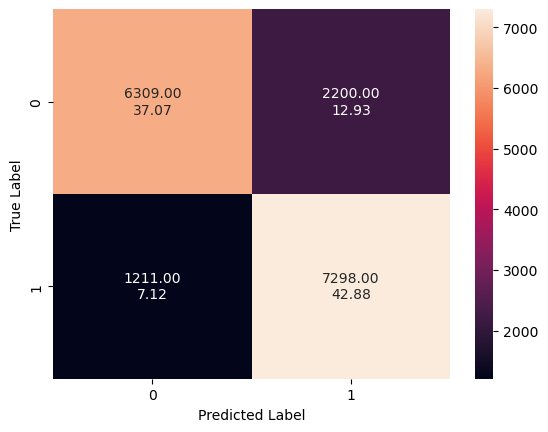

In [110]:
mod_eval_conf(dc1,x_over,y_over)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.749738         0.783986      0.863075  0.821632
----------------------------------------------------------------------------------------------------


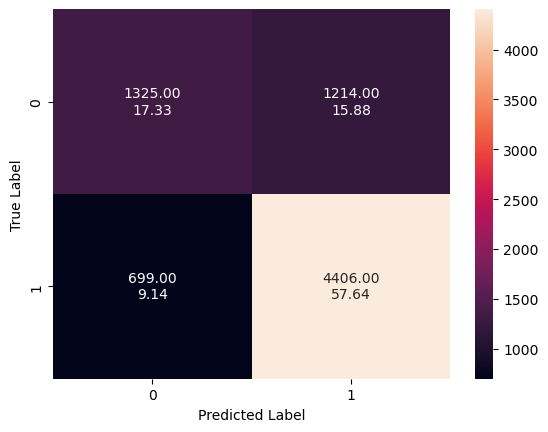

In [111]:
mod_eval_conf(dc1,x_val,y_val)

In [112]:
dtr_tu_tr=mod_eval(dc1,x_over,y_over)
dtr_tu_val=mod_eval(dc1,x_val,y_val)
dtr_tu_tr

,Accuracy Score,Precision score,Recall score,F1 score
0,0.799565,0.768372,0.85768,0.810574


### **Observation: Tuned Decision Tree**
- The tuned Decision Tree performance is better than the normal decision tree which over fits.
- The F1-score is better in the tuned model.

**2) Bagging classisfier tuning with Oversampled data**

In [115]:
bg1=bc(random_state=1)
param1={'n_estimators':[100,150,200],'max_samples':[0.7,0.8,0.9,1.0],'max_features':[0.7,0.8,0.9,1.0]}
sc=make_scorer(f1_score)
grid2=gsv(bg1,param_grid=param1,cv=4,scoring=sc,n_jobs=-1)
grid2.fit(x_over,y_over)
bg1=grid2.best_estimator_
bg1

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=150,
                  random_state=1)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.998531         0.997537       0.99953  0.998532
----------------------------------------------------------------------------------------------------


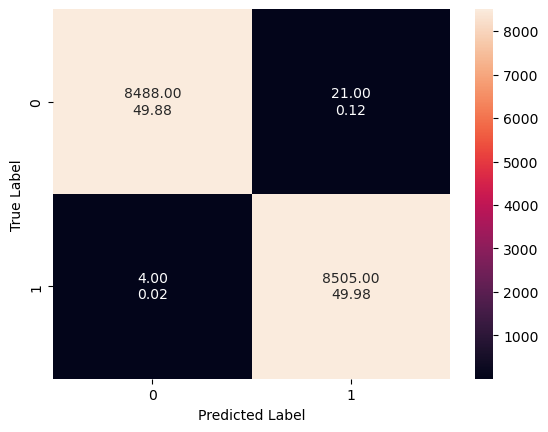

In [116]:
mod_eval_conf(bg1,x_over,y_over)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.739796         0.777917      0.854261  0.814303
----------------------------------------------------------------------------------------------------


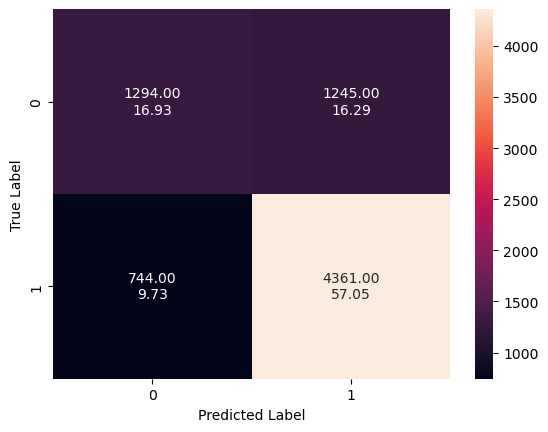

In [117]:
mod_eval_conf(bg1,x_val,y_val)

In [118]:
bc_tu_tr=mod_eval(bg1,x_over,y_over)
bc_tu_val=mod_eval(bg1,x_val,y_val)
bc_tu_val

,Accuracy Score,Precision score,Recall score,F1 score
0,0.739796,0.777917,0.854261,0.814303


### **Observation: Bagging Classifier**  
- The tuned Bagging Classifier demonstrates improved performance compared to the untuned version.  
- While the tuned model still exhibits overfitting, the level of overfitting is comparable that of the untuned classifier but better performance in validation.  
- The F1-score is higher in the tuned model, indicating better precision and recall balance.

**3)RandomForestClassifier tuning with Oversampled data**

In [121]:
rf1=rfc(random_state=1)
param2={"n_estimators": [150,200,250],"min_samples_leaf": np.arange(5, 10),"max_features": np.arange(0.2, 0.7, 0.1),"max_samples": np.arange(0.3, 0.7, 0.1)}
sc=make_scorer(f1_score)
grid3=gsv(rf1,param_grid=param2,scoring=sc,cv=4,n_jobs=-2)
grid3.fit(x_over,y_over)
rf1=grid3.best_estimator_
rf1

RandomForestClassifier(max_features=0.2, max_samples=0.6000000000000001,
                       min_samples_leaf=6, n_estimators=150, random_state=1)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.821601         0.795231      0.866259  0.829227
----------------------------------------------------------------------------------------------------


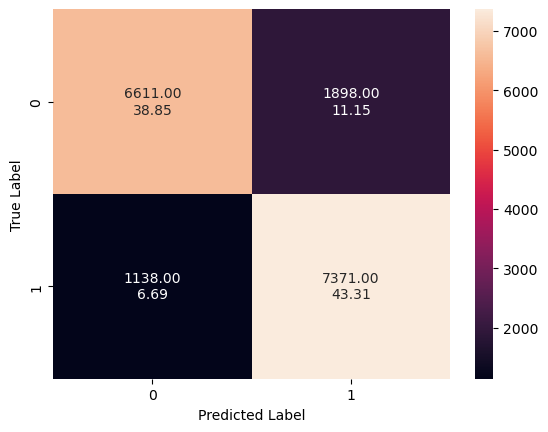

In [122]:
mod_eval_conf(rf1,x_over,y_over)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.751047         0.785893      0.862096  0.822233
----------------------------------------------------------------------------------------------------


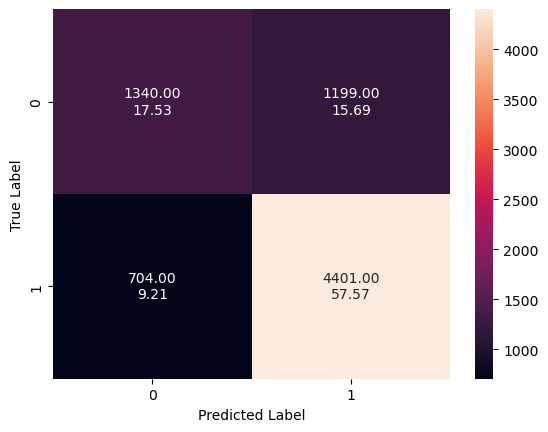

In [123]:
mod_eval_conf(rf1,x_val,y_val)

In [124]:
rf_tu_tr=mod_eval(rf1,x_over,y_over)
rf_tu_val=mod_eval(rf1,x_val,y_val)
rf_tu_tr

,Accuracy Score,Precision score,Recall score,F1 score
0,0.821601,0.795231,0.866259,0.829227


### **Observation: RandomForestClassifier**
- The Generalization of Tuned model is much better tuned than bagging classifier.
- Has Better scores Than tuned Decision Tree.

### **Boosting:**

### **model Building Boosting  with diff dataset**

**1) AdaboostingClassfier with three different datas**

In [129]:
ab1=abc(random_state=1)
ab1.fit(x_train,y_train)
ab2=abc(random_state=1)
ab2.fit(x_over,y_over)
ab3=abc(random_state=1)
ab3.fit(x_under,y_under)

AdaBoostClassifier(random_state=1)

In [130]:
# performance of Adaboosting based training on three different dataset.
pde(ab1,ab2,ab3)

,original,over,under
Accuracy Score,0.732182,0.798037,0.697589
Precision score,0.754316,0.760637,0.685284
Recall score,0.888354,0.869785,0.730797
F1 score,0.815866,0.811558,0.707309


In [131]:
# performance of Adaboosting based validating on three different dataset.
pdv(ab1,ab2,ab3)

,original,over,under
Accuracy Score,0.742805,0.742282,0.716510
Precision score,0.759293,0.767081,0.813353
Recall score,0.900294,0.881881,0.746915
F1 score,0.823804,0.820485,0.778719


In [132]:
ab_nor_tr=mod_eval(ab2,x_over,y_over)
ab_nor_val=mod_eval(ab2,x_val,y_val)
ab_nor_val

,Accuracy Score,Precision score,Recall score,F1 score
0,0.742282,0.767081,0.881881,0.820485


### **Observation**
**AdaBoost**:  
   - Performance improves significantly with the oversampled data, showing higher F1 scores than with the undersampled dataset.  
   - Comparable performance with the original dataset highlights the benefit of a balanced dataset.


**2) GradientboostingClassifier with three different datas**

In [135]:
g1=gbc(random_state=1)
g1.fit(x_train,y_train)
g2=gbc(random_state=1)
g2.fit(x_over,y_over)
g3=gbc(random_state=1)
g3.fit(x_under,y_under)

GradientBoostingClassifier(random_state=1)

In [136]:
# performance of Gradient boosting based training on three different dataset.
pde(g1,g2,g3)

,original,over,under
Accuracy Score,0.754710,0.812258,0.719215
Precision score,0.779892,0.779802,0.707820
Recall score,0.881537,0.870255,0.746632
F1 score,0.827605,0.822549,0.726708


In [137]:
# performance of Gradient boosting based validating on three different dataset.
pdv(g1,g2,g3)

,original,over,under
Accuracy Score,0.752224,0.748823,0.720304
Precision score,0.774961,0.778848,0.819927
Recall score,0.886386,0.871303,0.744760
F1 score,0.826937,0.822485,0.780538


In [138]:
gb_nor_tr=mod_eval(g2,x_over,y_over)
gb_nor_val=mod_eval(g2,x_val,y_val)
gb_nor_val

,Accuracy Score,Precision score,Recall score,F1 score
0,0.748823,0.778848,0.871303,0.822485


### **Observation**
**GBMBoost**:  
   - The model achieves better results on the oversampled data, surpassing the performance on undersampled data.  
   - Similar metrics to the original dataset are observed, but the balanced dataset improves overall reliability and fairness.

## **Data Observation**  
- After evaluating the performance of Boosting Ensembles on the training and validation sets across three different types of data, it was observed that models trained with **Oversampled Data** demonstrated superior generalization capabilities.  
- The oversampled models consistently provided optimal metric scores, indicating a better balance between precision and recall.
- So, OverSampled Data for further tuning of Boosting Ensembles.

### **Hyperparameter Tuning With Over Sampled dataset:**

**1)AdaBoostClassifier tuning with Oversampled data**

In [143]:
# Choose the type of classifier.
abc1= abc(random_state=1)
param4 = {
    "estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
sc=make_scorer(f1_score)
grid4= gsv(abc1, param4, scoring=sc,cv=5,n_jobs=-2)
grid4= grid4.fit(x_over, y_over)
abc1 = grid4.best_estimator_
abc1

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, random_state=1)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.809907         0.773718      0.876014  0.821694
----------------------------------------------------------------------------------------------------


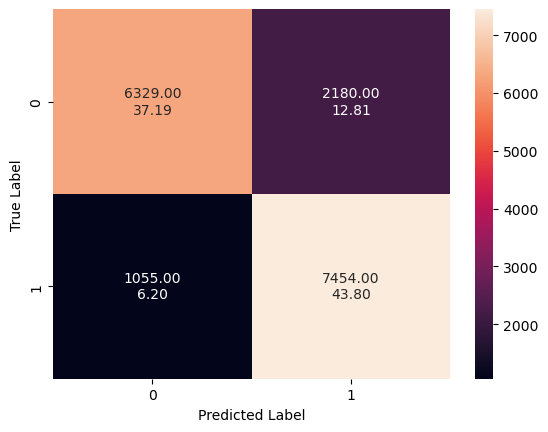

In [144]:
mod_eval_conf(abc1,x_over,y_over)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.752224         0.776572      0.883056  0.826398
----------------------------------------------------------------------------------------------------


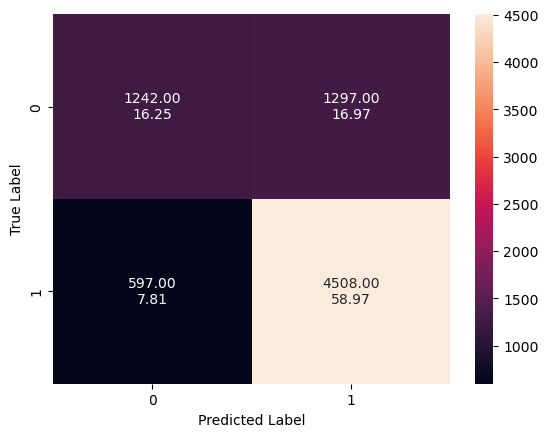

In [145]:
mod_eval_conf(abc1,x_val,y_val)

In [146]:
ab_tu_tr=mod_eval(abc1,x_over,y_over)
ab_tu_val=mod_eval(abc1,x_val,y_val)
ab_tu_val

,Accuracy Score,Precision score,Recall score,F1 score
0,0.752224,0.776572,0.883056,0.826398


### **Observation: AdaBoost Tuned**  
- The tuned AdaBoost model shows significant improvement compared to the untuned version.  
- It exhibits better generalization, achieving enhanced performance on validation dataset.


**2)GradientBoostClassifier tuning with Oversampled data**

In [149]:
gbc1= gbc(random_state=1)
param5 = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}
sc=make_scorer(f1_score)
grid5= gsv(gbc1, param5, scoring=sc,cv=5,n_jobs=-2)
grid5= grid5.fit(x_over, y_over)
gbc1 = grid5.best_estimator_
gbc1

GradientBoostingClassifier(max_features=0.9, random_state=1, subsample=1)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.812023         0.778302      0.872605   0.82276
----------------------------------------------------------------------------------------------------


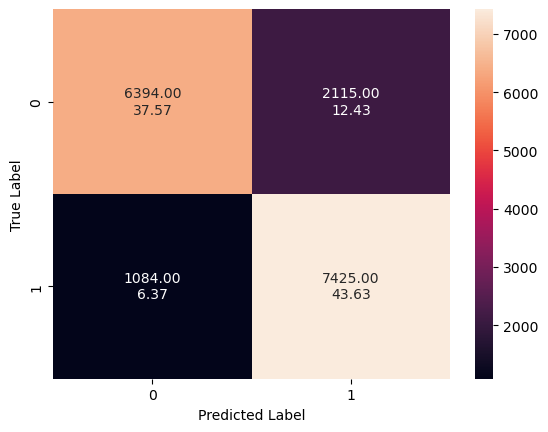

In [150]:
mod_eval_conf(gbc1,x_over,y_over)

   Accuracy Score  Precision score  Recall score  F1 score
0        0.749738         0.777372        0.8762  0.823833
----------------------------------------------------------------------------------------------------


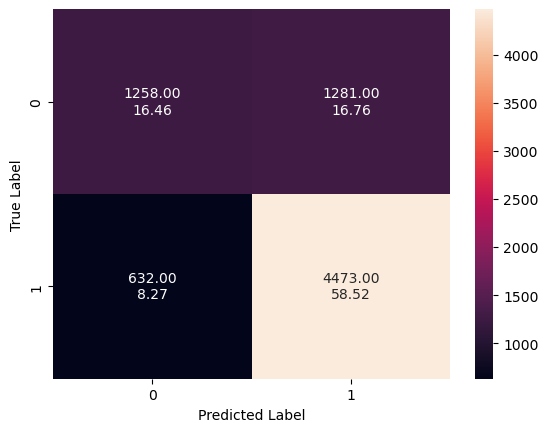

In [151]:
mod_eval_conf(gbc1,x_val,y_val)

In [152]:
gb_tu_tr=mod_eval(gbc1,x_over,y_over)
gb_tu_tr

,Accuracy Score,Precision score,Recall score,F1 score
0,0.812023,0.778302,0.872605,0.82276


In [153]:
gb_tu_val=mod_eval(gbc1,x_val,y_val)
gb_tu_val

,Accuracy Score,Precision score,Recall score,F1 score
0,0.749738,0.777372,0.8762,0.823833


### **Observation: GradientBoostClassifier (Tuned)**  
- The tuned GradientBoostClassifier demonstrates better generalization compared to the untuned model.  
- Its metric scores are comparable to those of the untuned model, indicating consistent performance.



## Model Comparison:


### The model Comparison on Training Set

In [157]:
df_model_comp_train=pd.concat([dtr_nor_tr.T,dtr_tu_tr.T,bc_nor_tr.T,bc_tu_tr.T,rf_nor_tr.T,rf_tu_tr.T,ab_nor_tr.T,ab_tu_tr.T,gb_nor_tr.T,gb_tu_tr.T],axis=1)

df_model_comp_train.columns=['Decision tree','Tuned Decision tree','BaggingClassifier','Tuned BaggingClassifier','RandomforestClassifier',
                             'Tuned RandomforestClassifier','AdaBoostClassifier','Tuned AdaBoostClassifier','GradientBoostClassifier'
                            ,'Tuned GradientBoostClassifier']
print('The model Comparison on Training Set')
print("**"*75)
df_model_comp_train.T

The model Comparison on Training Set
******************************************************************************************************************************************************


,Accuracy Score,Precision score,Recall score,F1 score
Decision tree,1.000000,1.000000,1.000000,1.000000
Tuned Decision tree,0.799565,0.768372,0.857680,0.810574
BaggingClassifier,0.988600,0.990560,0.986602,0.988577
Tuned BaggingClassifier,0.998531,0.997537,0.999530,0.998532
RandomforestClassifier,1.000000,1.000000,1.000000,1.000000
Tuned RandomforestClassifier,0.821601,0.795231,0.866259,0.829227
AdaBoostClassifier,0.798037,0.760637,0.869785,0.811558
Tuned AdaBoostClassifier,0.809907,0.773718,0.876014,0.821694
GradientBoostClassifier,0.812258,0.779802,0.870255,0.822549
Tuned GradientBoostClassifier,0.812023,0.778302,0.872605,0.822760


### The model Comparison on Validation Set

In [159]:
df_model_comp_val=pd.concat([dtr_nor_va.T,dtr_tu_val.T,bc_nor_val.T,bc_tu_val.T,rf_nor_val.T,rf_tu_val.T,ab_nor_val.T,ab_tu_val.T,gb_nor_val.T,gb_tu_val.T],axis=1)

df_model_comp_val.columns=['Decision tree','Tuned Decision tree','BaggingClassifier','Tuned BaggingClassifier','RandomforestClassifier',
                             'Tuned RandomforestClassifier','AdaBoostClassifier','Tuned AdaBoostClassifier','GradientBoostClassifier'
                            ,'Tuned GradientBoostClassifier']
print('The model Comparison on Validation Set')
print("**"*75)
df_model_comp_val.T

The model Comparison on Validation Set
******************************************************************************************************************************************************


,Accuracy Score,Precision score,Recall score,F1 score
Decision tree,0.658556,0.750855,0.731440,0.741020
Tuned Decision tree,0.749738,0.783986,0.863075,0.821632
BaggingClassifier,0.693878,0.770283,0.771792,0.771037
Tuned BaggingClassifier,0.739796,0.777917,0.854261,0.814303
RandomforestClassifier,0.725536,0.774913,0.830167,0.801589
Tuned RandomforestClassifier,0.751047,0.785893,0.862096,0.822233
AdaBoostClassifier,0.742282,0.767081,0.881881,0.820485
Tuned AdaBoostClassifier,0.752224,0.776572,0.883056,0.826398
GradientBoostClassifier,0.748823,0.778848,0.871303,0.822485
Tuned GradientBoostClassifier,0.749738,0.777372,0.876200,0.823833


### **The best model that goes to test set to check performance:**
-The best model is Tuned AdaBoost classifier which has the highest F1 score of 0.82'

### checking the best model with unseen data

   Accuracy Score  Precision score  Recall score  F1 score
0        0.747449         0.777749       0.87074  0.821622
----------------------------------------------------------------------------------------------------


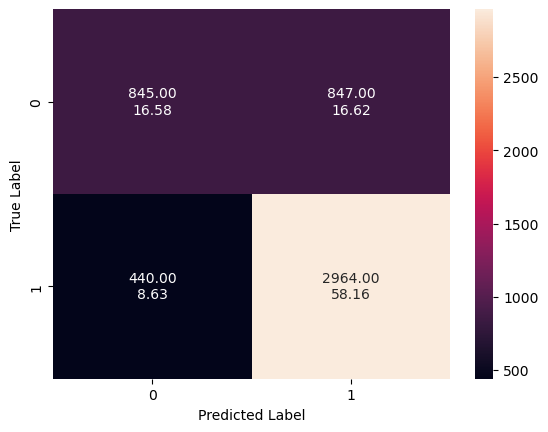

In [162]:
mod_eval_conf(abc1,x_test,y_test)

In [163]:
best_model1=pd.concat([mod_eval(abc1,x_over,y_over).T,mod_eval(abc1,x_val,y_val).T,mod_eval(abc1,x_test,y_test).T],axis=1)
best_model1.columns=['Training','validation','test']
best_model1

,Training,validation,test
Accuracy Score,0.809907,0.752224,0.747449
Precision score,0.773718,0.776572,0.777749
Recall score,0.876014,0.883056,0.870740
F1 score,0.821694,0.826398,0.821622


### **Observation**:

- The model maintains consistent performance across the training, validation, and test sets, with insignificant variation in the **F1 score**, the chosen evaluation metric.  
- This consistency confirms the model's ability to generalize well to unseen data while avoiding overfitting and underfitting.  
- The reliable performance metrics across datasets emphasize the model's robustness and effectiveness.  



### Feature Importances: best model (Tuned AdaBoostClassifier)

In [166]:
features=x_train.columns

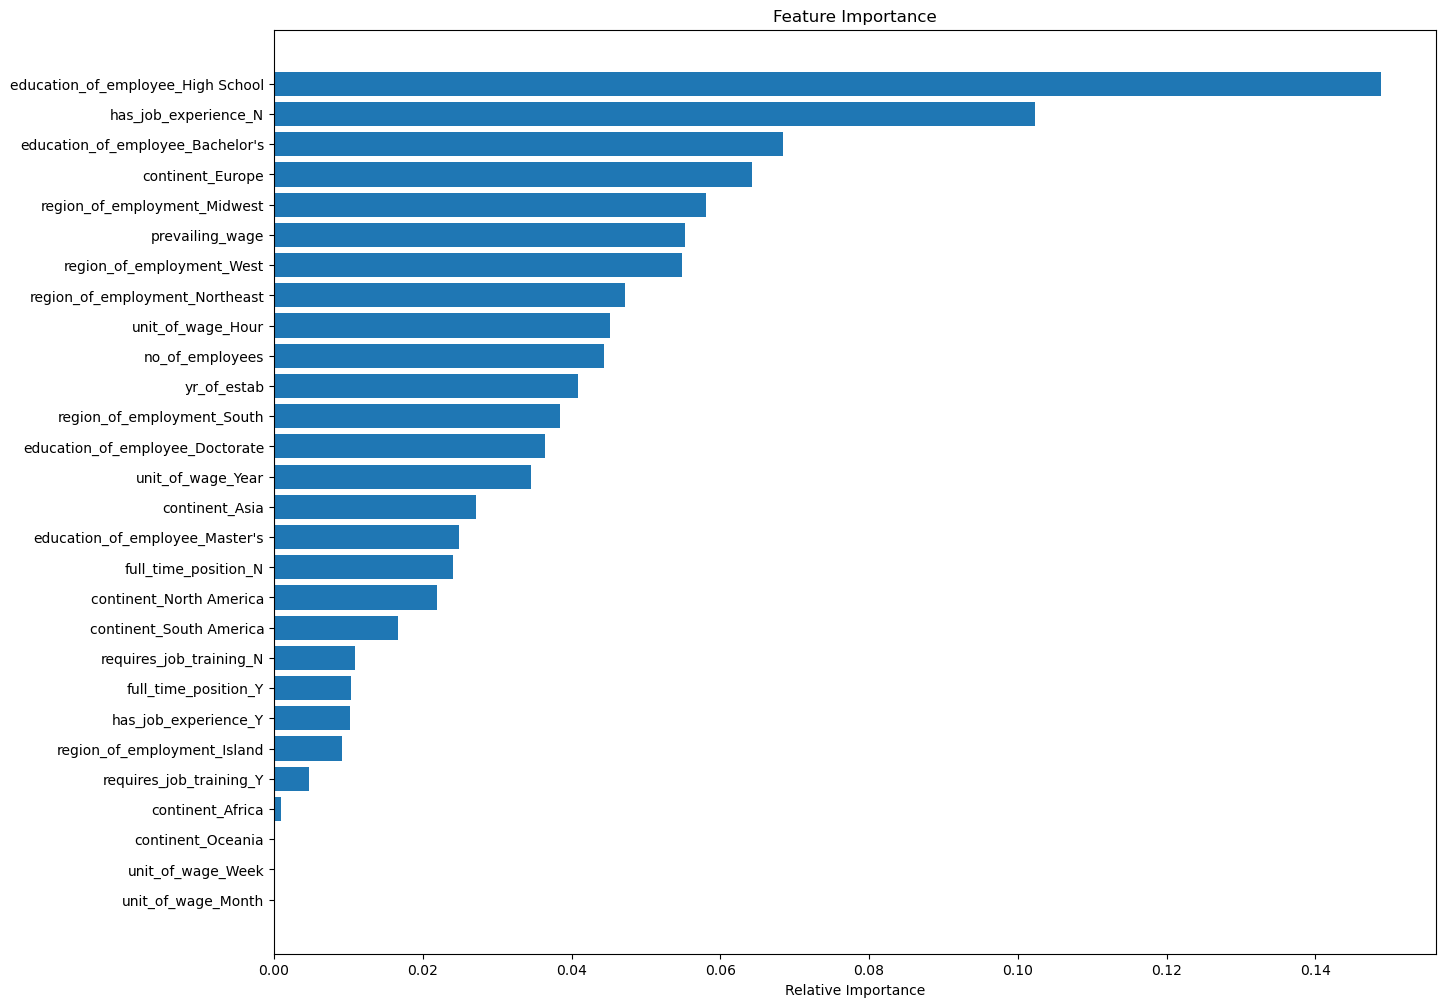

In [288]:
importances=abc1.feature_importances_
indices=np.argsort(importances)
plt.figure(figsize=(15,12))
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

### **Feature importance observation on the best tree**:
- `education_of_employee` and `has_job_experience` are the most influential attributes in determining whether worker's visa would get Approved or not.
- `prevailing_wage` and `continent` are the next best attributes to consider.

## **Key Insights and Recommendations for Visa Application Pre-Screening**

### Features pivotal for Visa Application Outcomes:
1. **Critical Variables for Prediction:**
   - **Education Level:** Applicants with "High School" education level contribute significantly to predicting visa denial.
   - **Job Experience:** The absence of prior job experience strongly influences visa application outcomes.
   - **Region of Employment:** Employment in the Midwest region has higher importance in determining approval.
   - **Prevailing Wage:** Higher wages are positively correlated with visa approval likelihood.
   - **Continent of Origin:** Europe, Asia, and Africa are critical factors for visa approval trends.

### Recommendations for Optimizing Pre-Screening:
2. **Prioritize Applications by Education Level:**
   - Prioritising the applicants with Bachelor's, Master's, or Doctorate degrees.
   - Applications with only a high school education can be deprioritized.

3. **Emphasize Experienced Applicants:**
   - Giving higher priority to those with prior job experience.

4. **Target Employment in Favorable Regions:**
   - Applications for jobs in the Midwest region should be prioritized even in eda it was found that the midwest region had higher number in the ratio of approved/denied, followed by Northeast and South regions.

5. **Segment Applications by Wage and Unit of Payment:**
   - Separate yearly and hourly wage applicants and prioritize based on prevailing wages.

6. **Examine Geographical Trends:**
   - Focus on applicants from regions with historically higher approval rates, such as Europe and Asia, while ensuring fairness in decisions.

7. **Consider Additional Data for Model Enhancement:**
   - Gathering some more relevant data could improve the accuracy and effectiveness of the predictive model.

By integrating these insights, the visa pre-screening process can be more effective, focusing on the most promising applicants while ensuring fairness and resource optimization.
